In [4]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


logging in as yuliana.corralesc@udea.edu.co ... please wait


error: invalid token, login again. Invalid padding... (set session.debug=True for tracebacks)

# 01.01 - PROYECTO KAGGLE

download data directly from Kaggle
create a file kaggle.json with your authentication token (in kaggle → click user icon on top-right → settings → API create new token)
upload it to this notebook workspace
run the following cell

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 50% 10.0M/20.1M [00:00<00:00, 93.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 111MB/s] 


## unzip and inspect data

In [6]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


load train.csv data with pandas

In [7]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


El archivo CSV llamado dataframe contiene 692,500 filas, es decir, tiene 692,500 registros u observaciones.
12 columnas: Cada registro tiene 12 atributos o variables.
Esto indica que el archivo train.csv contiene una gran cantidad de datos, con 692,500 ejemplos, cada uno descrito por 12 variables diferentes.

In [ ]:
z.head()

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    Técnica o tecnológica incompleta   
1            Estrato 3                 No      Técnica o tecnológica completa   
2            Estrato 3                 Si  Secundaria (Bachillerato) completa   
3            Estrato 4                 Si                             No sabe   
4            Estrato 3                 Si                   Primaria completa   

                  FAMI_EDUCACIONMADRE ESTU_PAGOMATRICULAPROPIO  \
0                           Postgrado                       No   
1    Técnica o tecnológica incompleta                       No   
2  Secundaria (Bachillerato) completa                       No   
3  Secundaria (Bachillerato) completa                       No   
4                   Primaria completa                       No   

  RENDIMIENTO_GLOBAL  
0         medio-alto  
1               bajo  
2               bajo  
3               alto  
4         medio-bajo

Acá vemos las primeras 5 filas del dataframe z, es decir, una muestra de los datos cargados para inspeccionarlos, con sus respectivas columnas.

In [ ]:
# Contar estudiantes por nivel de rendimiento global
rendimiento_estudiantes = z['RENDIMIENTO_GLOBAL'].value_counts()

# Mostrar los resultados
print(rendimiento_estudiantes)

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


# CONSULTAR DATOS FALTANTES

## Necesitamos identificar cuáles son los datos faltantes con el fin de decidir qué columnas podemos eliminar o imputar



In [ ]:
z.isnull().sum()


ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64

# INSPECCIONAR LA VARIABLE OBJETIVO


Utilizaremos Seaborn para crear un gráfico de distribución (displot) de la columna RENDIMIENTO_GLOBAL, con el fin de generar un gráfico de barras para visualizar la distribución de la variable categórica 'RENDIMIENTO_GLOBAL'.

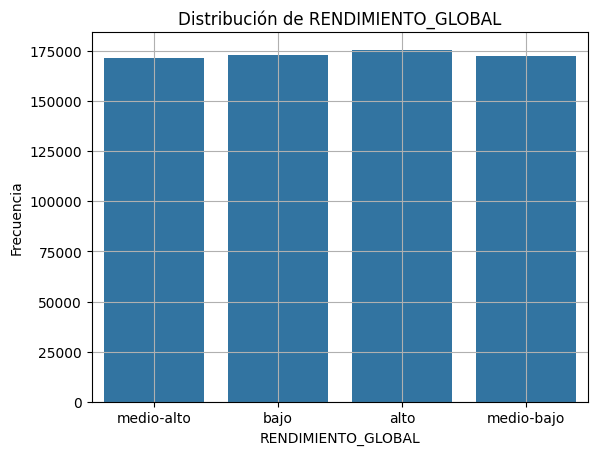

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un gráfico de barras para la variable rendimiento global
sns.countplot(x=z['RENDIMIENTO_GLOBAL'])  # Gráfico de conteo para variables categóricas
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.xlabel('RENDIMIENTO_GLOBAL')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



# DESCUBRIR LOS TIPOS DE DATOS

## Para descubrir los tipos de datos de las columnas del DataFrame y ver qué columnas están presentes, utilizaremos el método dtypes junto con columns para obtener información completa sobre las columnas y sus tipos

In [ ]:
# Mostrar todas las columnas del DataFrame z
print(z.columns)

# Mostrar los tipos de datos de cada columna en el DataFrame z
print("\nTipos de datos de cada columna:")
print(z.dtypes)


Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

Tipos de datos de cada columna:
ID                                 int64
PERIODO                            int64
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_EDUCACIONMADRE               object
ESTU_PAGOMATRICULAPROPIO          object
RENDIMIENTO_GLOBAL                object
dtype: object


## Exploramos visualmente la relación entre el rendimiento académico de los estudiantes y otros factores como el valor de la matrícula universitaria, las horas trabajadas semanalmente y el estrato socioeconómico de la vivienda. Este tipo de análisis puede ayudar a identificar patrones, correlaciones, etc.

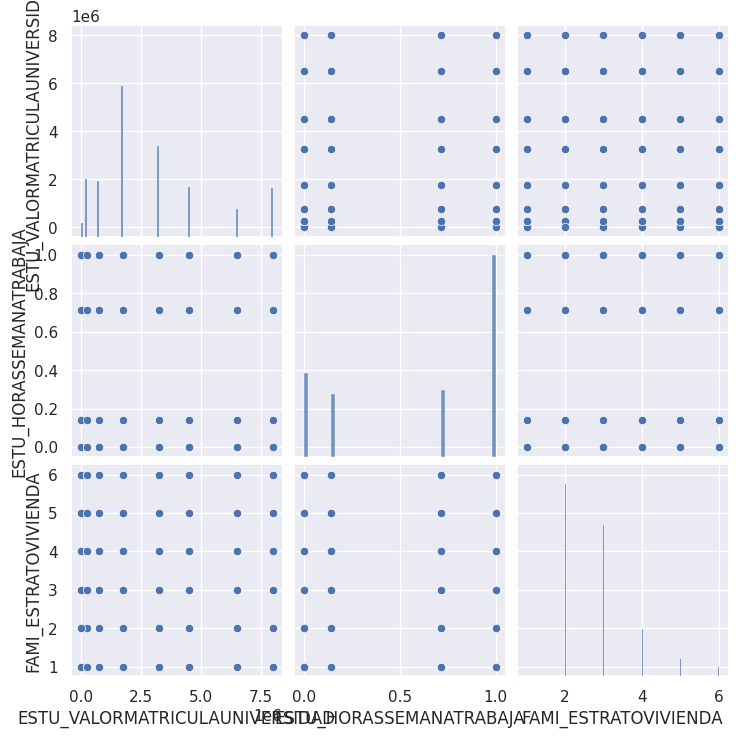

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las columnas numéricas junto con la variable de interés 'RENDIMIENTO_GLOBAL'
cols = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']

# Configurar el estilo de Seaborn
sns.set()

# Crear el pairplot para las columnas seleccionadas
sns.pairplot(z[cols])

# Mostrar el gráfico
plt.show()




# INSPECCIÓN VARIABLES CATEGÓRICAS

In [ ]:
# Inspeccionar las columnas categóricas (no numéricas) en el DataFrame z
ccols = [i for i in z.columns if not i in z._get_numeric_data()]
print("Columnas categóricas:", ccols)



Columnas categóricas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']


<ipython-input-43-f2925cee31b5>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


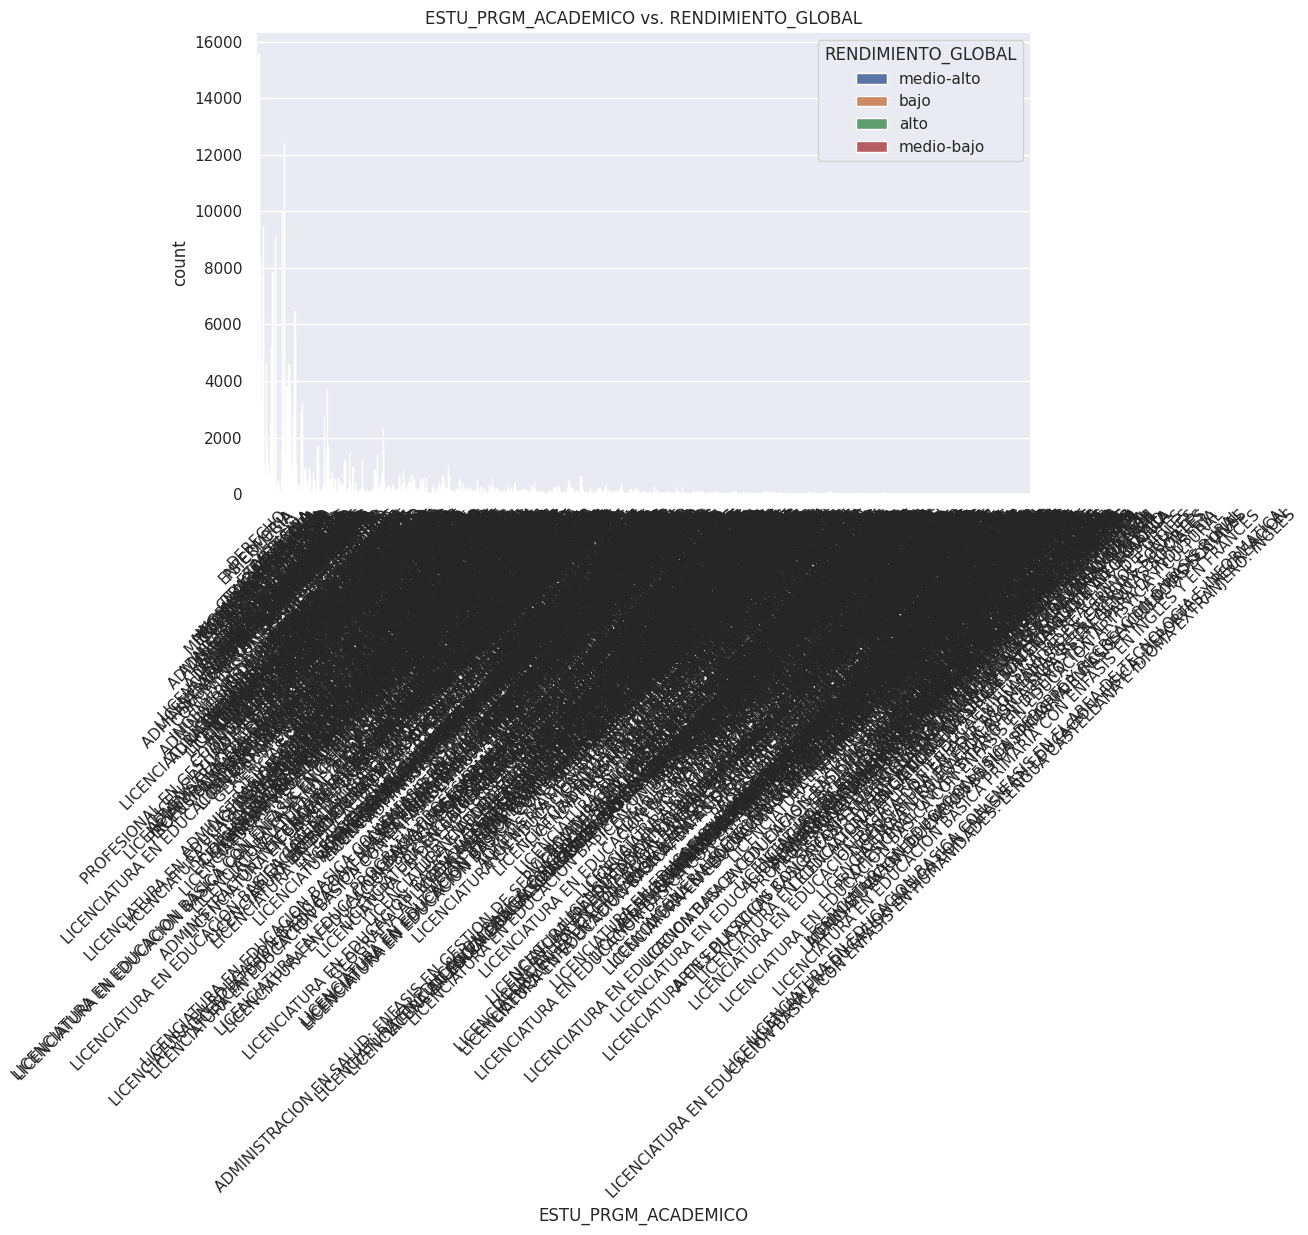

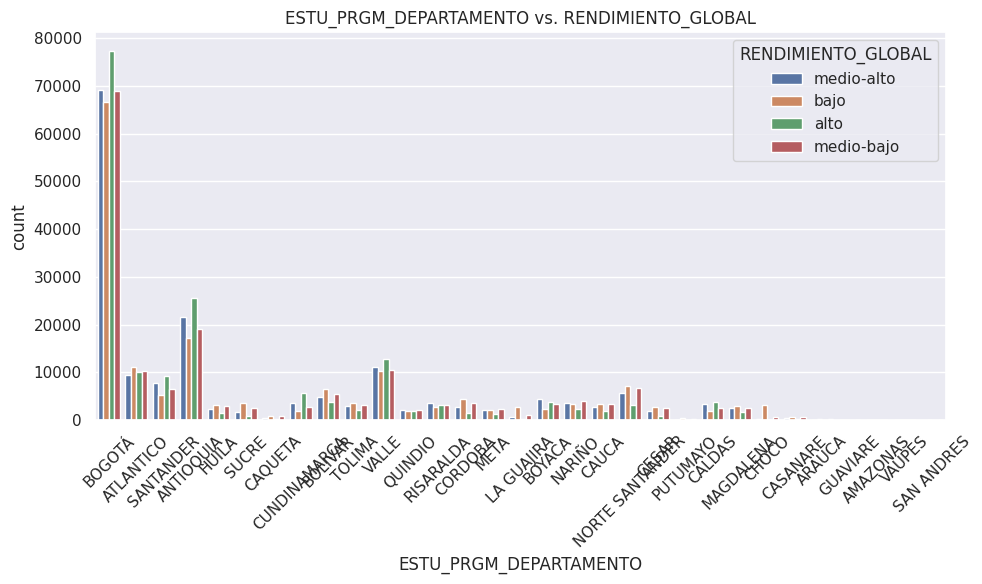

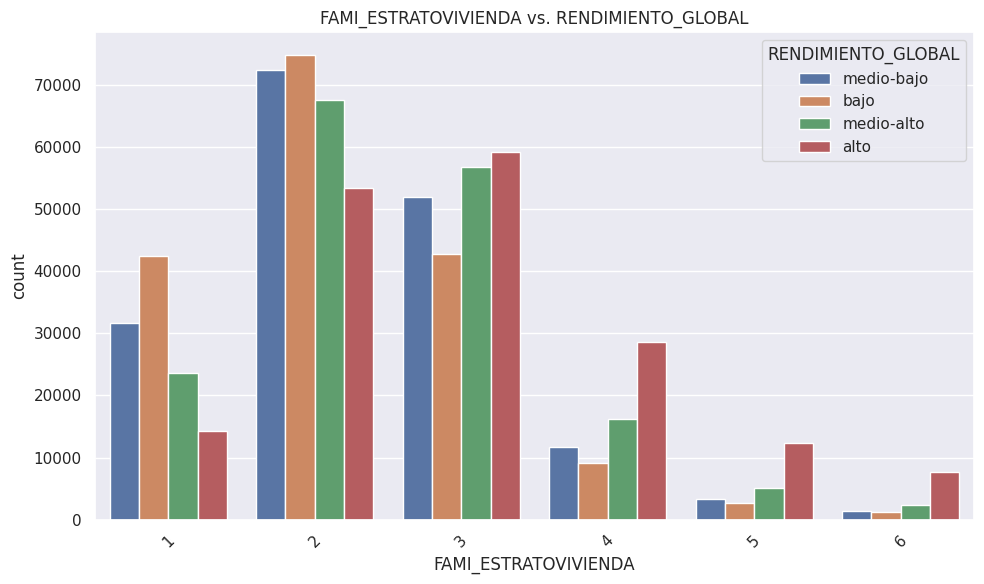

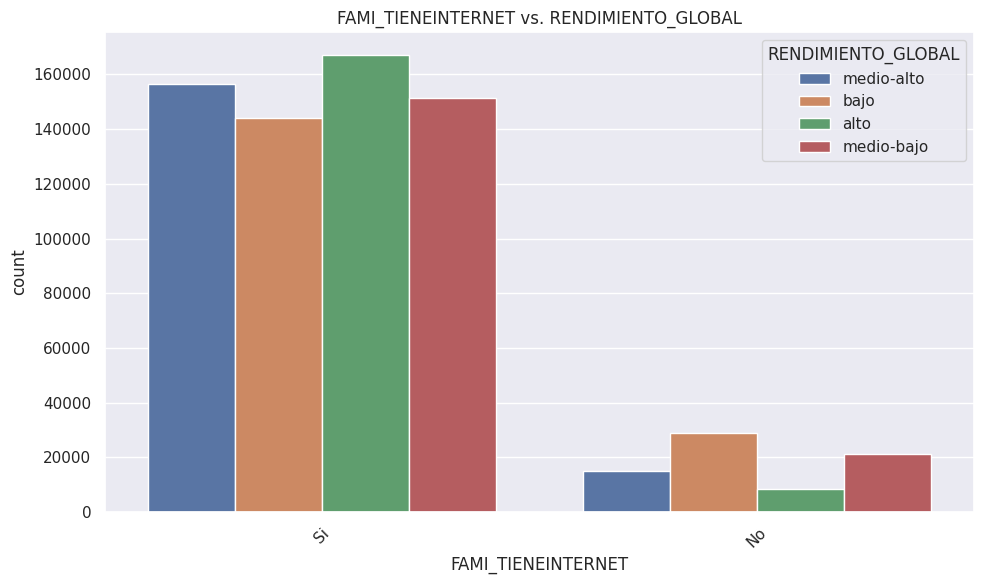

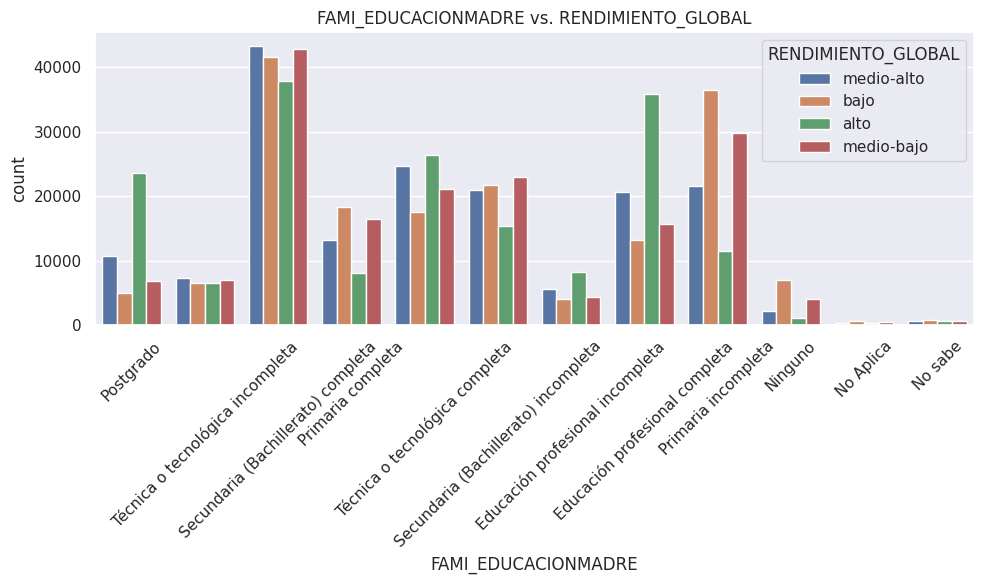

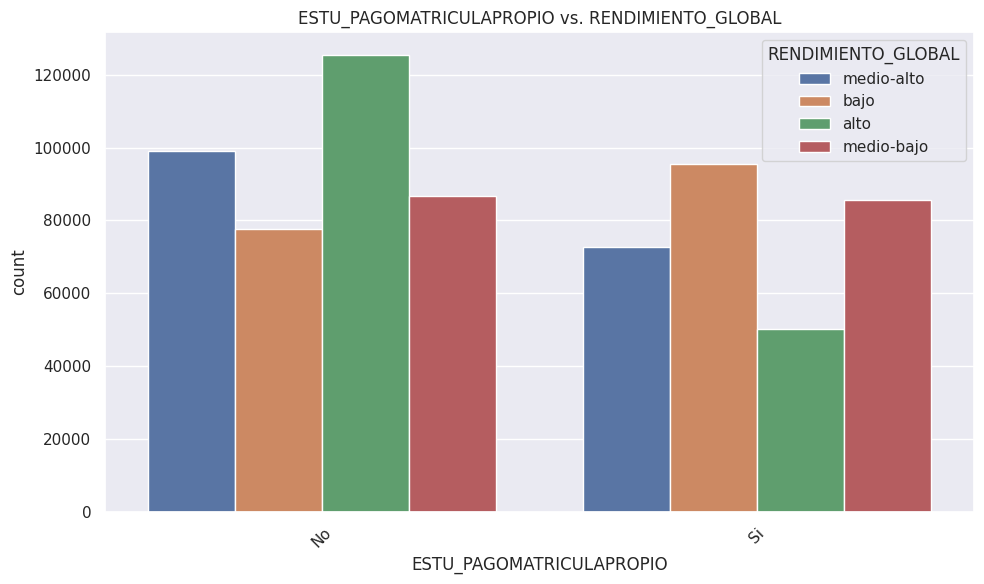

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listado de columnas categóricas
categorical_cols = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

# Crear gráficos comparando cada columna categórica con RENDIMIENTO_GLOBAL
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=z, x=col, hue='RENDIMIENTO_GLOBAL')
    plt.title(f'{col} vs. RENDIMIENTO_GLOBAL')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# MODELOS

# Modelo de árboles de decisión

 Este código implementa el modelo de regresión basado en árboles de decisión para predecir valores continuos a partir de datos tabulares. Comienza cargando un conjunto de datos y reemplazando valores faltantes con 'DESCONOCIDO'. Las variables categóricas se transforman en valores numéricos usando LabelEncoder, permitiendo que el modelo pueda procesarlas. Las características (X) se separan de la variable objetivo (y), y se normalizan utilizando StandardScaler para evitar sesgos relacionados con escalas de magnitudes diferentes. Adicionalmente, la variable objetivo se escala entre 0 y 1, ayudando al modelo a manejar mejor valores extremos y estabilizar su rendimiento.

Posteriormente, se define un modelo de árbol de decisión con una profundidad máxima de 5 para evitar sobreajuste. La métrica de evaluación seleccionada es el Error Absoluto Medio (MAE), que mide la precisión del modelo en términos de la diferencia promedio entre las predicciones y los valores reales. Se realiza una validación cruzada con 10 divisiones, evaluando el modelo tanto en el conjunto de entrenamiento como en el de prueba. Finalmente, se imprimen los puntajes de la validación cruzada y se examinan ejemplos de predicciones frente a los valores reales escalados, proporcionando una visión general del rendimiento y posibles áreas de mejora del modelo.

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

# 1. Cargar los datos
df = pd.read_csv('train.csv')  # Cambia la ruta si es necesario

# 2. Manejar valores faltantes
df.fillna('DESCONOCIDO', inplace=True)

# 3. Codificar variables categóricas
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 4. Separar características (X) y variable objetivo (y)
X = df.drop(columns=['RENDIMIENTO_GLOBAL', 'ID'])  # Ajusta las columnas según tu dataset
y = df['RENDIMIENTO_GLOBAL']

# 5. Normalizar características (X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 6. Escalar la variable objetivo para evitar valores extremos
y_scaled = (y - y.min()) / (y.max() - y.min())  # Normalización entre 0 y 1

# 7. Definir el modelo base
estimator1 = DecisionTreeRegressor(max_depth=5)

# 8. Cambiar la métrica a MAE
def mae(estimator, X, y):
    preds = estimator.predict(X)
    return mean_absolute_error(y, preds)

# 9. Validación cruzada con MAE
z1 = cross_validate(
    estimator1,
    X_normalized,  # Usar características normalizadas
    y_scaled,  # Usar la variable objetivo escalada
    return_train_score=True,
    return_estimator=True,
    scoring=mae,
    cv=ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
)

# 10. Mostrar resultados de validación cruzada
print("Puntajes de validación cruzada (train):", z1['train_score'])
print("Puntajes de validación cruzada (test):", z1['test_score'])
print("Promedio del puntaje (test):", np.mean(z1['test_score']))

# 11. Verificar predicciones y valores reales
print("\n--- Diagnóstico de Predicciones ---")
estimator = z1['estimator'][0]  # Usar el primer modelo entrenado
preds = estimator.predict(X_normalized)
print("Ejemplo de Predicciones:", preds[:10])
print("Valores Reales (y_scaled):", y_scaled.values[:10])



Puntajes de validación cruzada (train): [0.31747762 0.31770486 0.31773334 0.31805308 0.31797413 0.3176703
 0.31763093 0.31766066 0.31761548 0.31761803]
Puntajes de validación cruzada (test): [0.31807511 0.3171943  0.31836639 0.31718573 0.31744592 0.31811291
 0.31800125 0.31789667 0.31817334 0.31759204]
Promedio del puntaje (test): 0.31780436684892427

--- Diagnóstico de Predicciones ---
Ejemplo de Predicciones: [0.39284611 0.56840386 0.56840386 0.49168797 0.56840386 0.35254563
 0.56840386 0.59805821 0.39284611 0.47826898]
Valores Reales (y_scaled): [0.66666667 0.33333333 0.33333333 0.         1.         0.66666667
 0.         1.         1.         0.        ]


Los resultados son razonables y reflejan un desempeño relativamente estable del modelo.

1. Puntajes de Validación Cruzada
Train Scores:

Los valores de entrenamiento están alrededor de 0.3176, lo que indica que el modelo tiene un error promedio absoluto relativo bajo en el conjunto de entrenamiento.
Test Scores:

Los valores de prueba están alrededor de 0.3178, mostrando una consistencia con los puntajes de entrenamiento, lo cual sugiere que el modelo no está sobreajustado.
Promedio del Puntaje de Prueba:

El promedio de 0.3178 significa que, en promedio, el error absoluto relativo del modelo en los datos de prueba es del 31.78%.
2. Diagnóstico de Predicciones
Ejemplo de Predicciones:

El modelo genera valores razonables que oscilan entre 0.35 y 0.59, lo que refleja una buena estabilidad en las predicciones para los datos escalados.
Valores Reales (y_scaled):

Los valores reales están escalados entre 0 y 1, lo que está bien alineado con las predicciones del modelo.
Observación Clave:

En algunos casos, las predicciones son razonablemente cercanas a los valores reales (por ejemplo, 0.568 vs. 0.333), pero en otros casos, el error parece mayor (por ejemplo, 0.392 vs. 0.666).
3. Conclusión de los Resultados
Desempeño Global:

El modelo es estable y generaliza bien, ya que los puntajes de entrenamiento y prueba son muy similares.
Áreas de Mejora:

El modelo tiene problemas con algunos valores extremos, como se observa en los ejemplos de predicciones. Esto podría deberse a:
La profundidad limitada del árbol de decisión (max_depth=5).
Características no informativas o ruidosas en el conjunto de datos.

# Modelo Random Forest
Acá se implementó el modelo de clasificación Random Forest para predecir categorías en un conjunto de datos tabulares. Comienza cargando los datos y reemplazando valores faltantes con 'DESCONOCIDO'. Luego, las variables categóricas se codifican en valores numéricos usando LabelEncoder, asegurando que el modelo pueda procesarlas. Posteriormente, los datos se dividen en conjuntos de entrenamiento y prueba en una proporción 70/30, manteniendo las proporciones de las clases para una evaluación justa. Con el conjunto de entrenamiento, se entrena el modelo Random Forest, que crea varios árboles de decisión y combina sus predicciones para obtener una mayor precisión.

Después del entrenamiento, el modelo realiza predicciones en el conjunto de prueba. Para evaluar su rendimiento, se generan métricas como precisión, recall y F1-score mediante un reporte de clasificación. Adicionalmente, se crea una matriz de confusión que muestra los aciertos y errores del modelo, lo que permite identificar patrones de fallo. Finalmente, esta matriz se visualiza como un gráfico para facilitar su interpretación.



Datos cargados exitosamente.


<ipython-input-26-194152b9727c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-26-194152b9727c>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

No hay columnas numéricas en las características seleccionadas para normalizar.

F1-Score promedio en validación cruzada: 0.4084

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56     52686
           1       0.44      0.52      0.48     51896
           2       0.32      0.29      0.30     51486
           3       0.31      0.28      0.30     51682

    accuracy                           0.42    207750
   macro avg       0.41      0.41      0.41    207750
weighted avg       0.41      0.42      0.41    207750

F1-Score (weighted): 0.4113


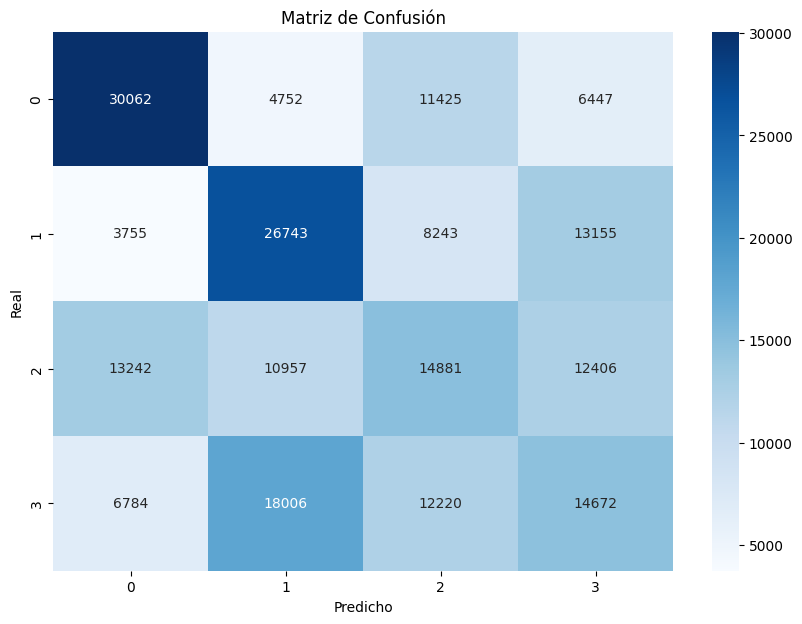

In [ ]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
df = pd.read_csv('train.csv')
print("Datos cargados exitosamente.")

# 2. Manejo avanzado de valores faltantes
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include='object').columns

for column in num_columns:
    df[column].fillna(df[column].median(), inplace=True)
for column in cat_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# 3. Codificar variables categóricas
label_encoders = {}
for column in cat_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Codificar la variable objetivo
target_encoder = LabelEncoder()
df['RENDIMIENTO_GLOBAL'] = target_encoder.fit_transform(df['RENDIMIENTO_GLOBAL'])

# 4. Seleccionar características relevantes
selected_features = [
    'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_PRGM_ACADEMICO', 'ESTU_HORASSEMANATRABAJA'
]
X = df[selected_features]
y = df['RENDIMIENTO_GLOBAL']

# Normalizar solo las columnas numéricas relevantes
scaler = StandardScaler()
num_columns_in_X = [col for col in num_columns if col in selected_features]

if num_columns_in_X:
    X[num_columns_in_X] = scaler.fit_transform(X[num_columns_in_X])
else:
    print("No hay columnas numéricas en las características seleccionadas para normalizar.")

# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 6. Entrenar el modelo Random Forest con parámetros optimizados
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=300,         # Aumentar el número de árboles
    max_depth=20,             # Probar mayor profundidad
    min_samples_split=4,      # Reducir para considerar más splits
    max_features='sqrt'       # Elegir un subconjunto aleatorio de características
)
rf_model.fit(X_train, y_train)

# Validación cruzada para medir estabilidad
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"\nF1-Score promedio en validación cruzada: {cv_scores.mean():.4f}")

# 7. Hacer predicciones
y_pred = rf_model.predict(X_test)

# 8. Evaluar el modelo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1:.4f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [2]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00


# Modelo CatBoostClassifier

Acá se uso el modelo CatBoostClassifier, este es un modelo de clasificación robusto diseñado para manejar variables categóricas de manera nativa, para predecir una variable objetivo a partir de datos tabulares. Comienza cargando un conjunto de datos y maneja valores faltantes: las columnas numéricas se completan con su mediana, mientras que las categóricas se rellenan con su moda. La variable objetivo, RENDIMIENTO_GLOBAL, se codifica utilizando LabelEncoder para transformarla en valores numéricos. Posteriormente, se seleccionan características relevantes para el modelo, incluyendo variables categóricas y numéricas.

Las características seleccionadas se dividen en conjuntos de entrenamiento y prueba con un 30 % reservado para la evaluación. El modelo CatBoostClassifier se configura con 500 iteraciones, una tasa de aprendizaje de 0.1 y una profundidad de 8, además de especificar las columnas categóricas dentro de las características seleccionadas. Luego, se entrena el modelo en el conjunto de entrenamiento. Finalmente, se generan predicciones en el conjunto de prueba, se calcula el F1-Score ponderado, y se produce un reporte de clasificación que incluye métricas como precisión, recall y F1 por clase. También se visualiza una matriz de confusión para evaluar el rendimiento general del modelo y analizar los errores de clasificación en cada categoría.

Datos cargados exitosamente.


<ipython-input-27-ead90c02ab50>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[column].fillna(df[column].median(), inplace=True)  # Usar la mediana del entrenamiento
<ipython-input-27-ead90c02ab50>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

0:	learn: 1.3615477	test: 1.3612734	best: 1.3612734 (0)	total: 2.31s	remaining: 1h 16m 52s
100:	learn: 1.2127892	test: 1.2120382	best: 1.2120382 (100)	total: 2m 15s	remaining: 42m 23s
200:	learn: 1.2071587	test: 1.2105022	best: 1.2105022 (200)	total: 4m 30s	remaining: 40m 19s
300:	learn: 1.2028533	test: 1.2100167	best: 1.2100167 (300)	total: 6m 47s	remaining: 38m 21s
400:	learn: 1.1988796	test: 1.2098248	best: 1.2098214 (397)	total: 9m 4s	remaining: 36m 11s
500:	learn: 1.1948948	test: 1.2098035	best: 1.2097910 (470)	total: 11m 19s	remaining: 33m 52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.20979096
bestIteration = 470

Shrink model to first 471 iterations.

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58     52686
           1       0.43      0.60      0.50     51896
           2       0.33      0.28      0.30     51486
           3       0.32      0.22      0.26     51682

    accur

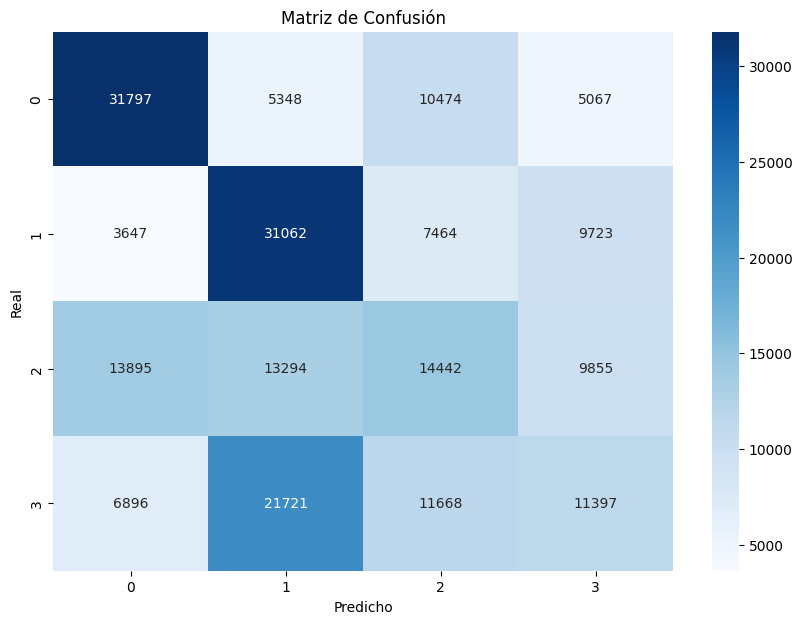

Archivo de submission creado exitosamente: submission_catboost.csv


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Datos cargados exitosamente.")

# 2. Manejo avanzado de valores faltantes
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include='object').columns

# Rellenar valores faltantes para numéricas
# Manejo avanzado de valores faltantes para numéricas y categóricas
for column in num_columns:
    if column in test_df.columns:  # Verificar que la columna exista en test_df
        test_df[column].fillna(df[column].median(), inplace=True)  # Usar la mediana del entrenamiento
    df[column].fillna(df[column].median(), inplace=True)

for column in cat_columns:
    if column in test_df.columns:  # Verificar que la columna exista en test_df
        test_df[column].fillna(df[column].mode()[0], inplace=True)  # Usar la moda del entrenamiento
    if column in df.columns:  # Verificar que la columna exista en df
        df[column].fillna(df[column].mode()[0], inplace=True)

# 3. Codificar la variable objetivo
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
df['RENDIMIENTO_GLOBAL'] = target_encoder.fit_transform(df['RENDIMIENTO_GLOBAL'])

# 4. Seleccionar características relevantes
selected_features = [
    'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_PRGM_ACADEMICO'
]
X = df[selected_features]
y = df['RENDIMIENTO_GLOBAL']

# Identificar las columnas categóricas dentro de las características seleccionadas
categorical_features = [col for col in selected_features if col in cat_columns]

# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Entrenar el modelo CatBoost con early_stopping
catboost_model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.1,
    depth=8,
    cat_features=categorical_features,
    random_seed=42,
    verbose=100
)

catboost_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

# 7. Hacer predicciones
y_pred = catboost_model.predict(X_test)

# 8. Evaluar el modelo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1:.4f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# 9. Preparar la submission
test_X = test_df[selected_features]
test_predictions = catboost_model.predict(test_X)
predicted_categories = target_encoder.inverse_transform(test_predictions)

submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'RENDIMIENTO_GLOBAL': predicted_categories
})

submission_file = 'submission_catboost.csv'
submission_df.to_csv(submission_file, index=False)
print(f"Archivo de submission creado exitosamente: {submission_file}")

# Descargar el archivo de submission
from google.colab import files
files.download(submission_file)
